# Data Preprocessing Steps

Apply following steps to dataset given in a url
---https://drive.google.com/open?id=1NKMy-zIT3tfpNLnA7G0EmPxgZe0OPXp_ 

Handling missing data

Handling categorical data

Split the dataset into training set and test set

Feature scaling

In [5]:
#importing matplotlib 
import matplotlib.pyplot as plt
#importing seaborn
import seaborn as sea
#importing waninings
import warnings 
warnings.filterwarnings('ignore')
#importing pandas 
import pandas as pd
# loading csv data from the file given in the url
csv_data = pd.read_csv("data_preprocessing.csv")
#prinding info of data
csv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
Country      10 non-null object
Age          9 non-null float64
Salary       9 non-null float64
Purchased    10 non-null object
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


In [6]:
#showing the data set to output
csv_data

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


# Handling missing data

In [7]:
#checking out missing values
csv_data.isnull().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

In [10]:
#viewing null colomns of salary
csv_data[csv_data['Salary'].isnull()]

,Country,Age,Salary,Purchased
4,Germany,40.0,NaN,Yes


In [11]:
#viewing null colomns of age
csv_data[csv_data['Age'].isnull()]

,Country,Age,Salary,Purchased
6,Spain,NaN,52000.0,No


In [15]:
#getting salary data between a range
csv_data[(csv_data['Salary'] > 0) & (csv_data['Salary'] < 60000)]

,Country,Age,Salary,Purchased
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No


In [16]:
#getting age data between a range
csv_data[(csv_data['Age'] > 30) & (csv_data['Age'] < 50)].sort_values(by = 'Age')

,Country,Age,Salary,Purchased
5,France,35.0,58000.0,Yes
9,France,37.0,67000.0,Yes
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
0,France,44.0,72000.0,No
7,France,48.0,79000.0,Yes


In [17]:
#filling null values of salary and age
csv_data['Age'] = csv_data['Age'].fillna(28)
csv_data['Salary'] = csv_data['Salary'].fillna(64000)

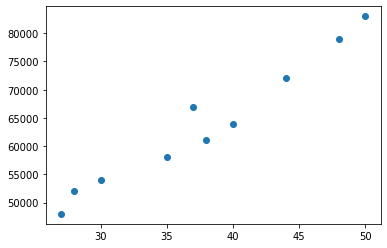

In [20]:
#plotting grapg of final data
plt.scatter(csv_data['Age'],csv_data['Salary'])

# Handling categorical data

In [21]:
#getting values only from dataset
csv_data.iloc[:,:].values

array([['France', 44.0, 72000.0, 'No'],
       ['Spain', 27.0, 48000.0, 'Yes'],
       ['Germany', 30.0, 54000.0, 'No'],
       ['Spain', 38.0, 61000.0, 'No'],
       ['Germany', 40.0, 64000.0, 'Yes'],
       ['France', 35.0, 58000.0, 'Yes'],
       ['Spain', 28.0, 52000.0, 'No'],
       ['France', 48.0, 79000.0, 'Yes'],
       ['Germany', 50.0, 83000.0, 'No'],
       ['France', 37.0, 67000.0, 'Yes']], dtype=object)

In [23]:
#converting or dividing country column as binary input
country_binary = pd.get_dummies(csv_data['Country'])
country_binary

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,1,0
5,1,0,0
6,0,0,1
7,1,0,0
8,0,1,0
9,1,0,0


# Split the dataset into training set and test set

In [29]:
#seperating values into x and y
x = csv_data.iloc[:,:4]
y = csv_data['Purchased'].values
x

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,64000.0,Yes
5,France,35.0,58000.0,Yes
6,Spain,28.0,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [30]:
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

In [32]:
#Splitting the data into training and testing
x_train, x_test, y_train, y_test = (x[:7], x[7:10], y[:7], y[7:10])

In [33]:
#showing output
x_train

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,64000.0,Yes
5,France,35.0,58000.0,Yes
6,Spain,28.0,52000.0,No


In [34]:
y_train

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No'], dtype=object)

In [35]:
x_test

,Country,Age,Salary,Purchased
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [36]:
y_test

array(['Yes', 'No', 'Yes'], dtype=object)

# Feature scaling

In [37]:
#Standardizing the data

for i in range(len(csv_data['Salary'])):
    csv_data['Salary'][i] = (csv_data['Salary'][i] - csv_data['Salary'].mean()) / csv_data['Salary'].std()
    
for i in range(len(csv_data['Age'])):
    csv_data['Age'][i] = (csv_data['Age'][i] - csv_data['Age'].mean()) / csv_data['Age'].std()

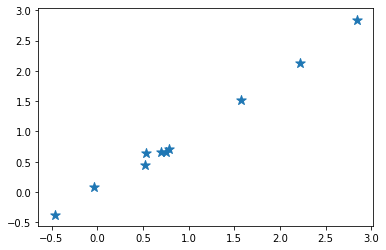

In [39]:
#plotting graph
plt.scatter(x = csv_data['Age'].values, y = csv_data['Salary'].values, marker = '*', alpha = 1, s = 100)